# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


base_directory_data_str =  base_directory_str + '/data/figure1_2_data/'
base_directory_figure_str =  base_directory_str + '/figures/figure1_2/'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'

plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

                

Mounted at /content/gdrive
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
cpu


# Figure 1

## Plot eigenvalue histograms for figure 1

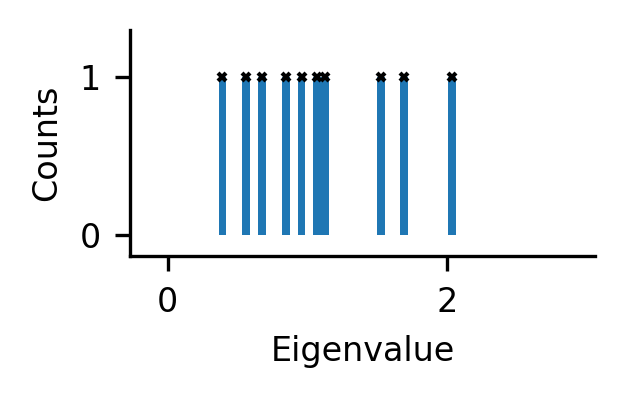

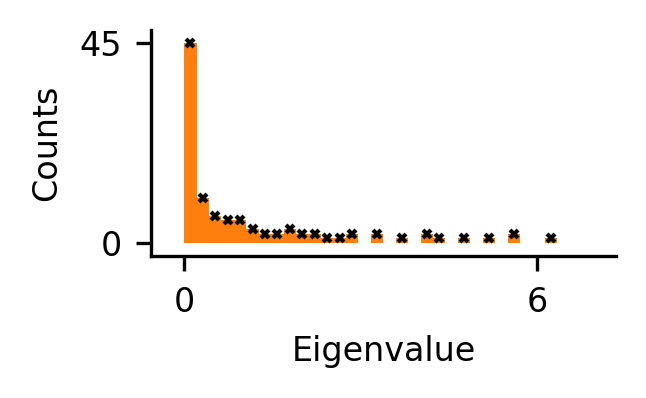

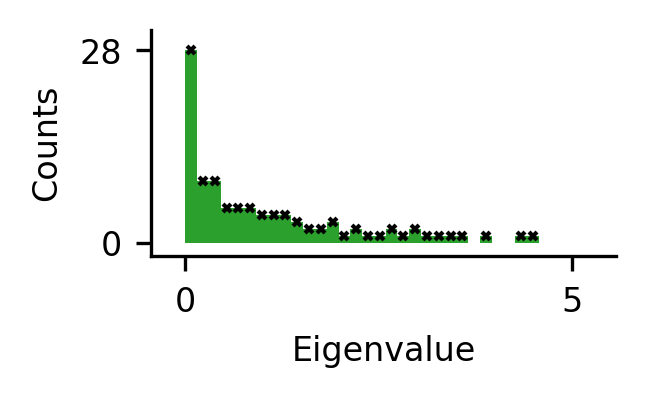

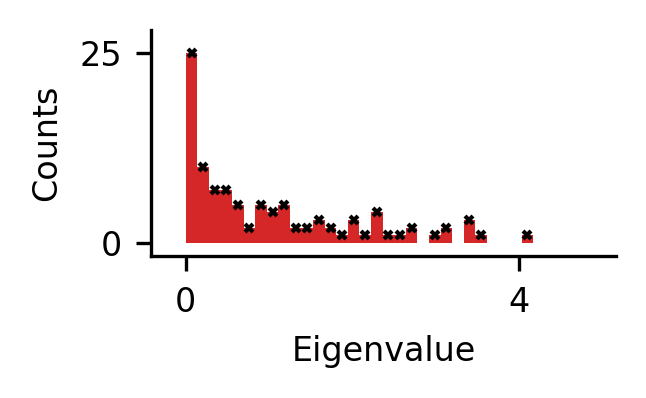

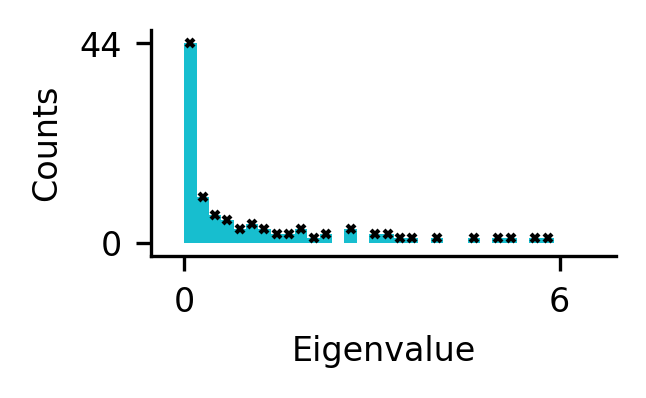

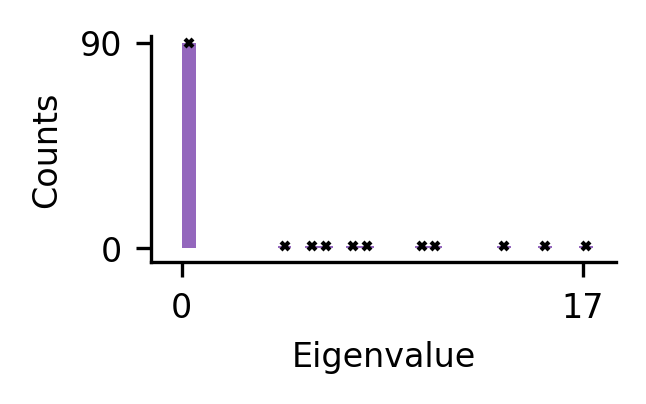

In [ ]:
# cond 1
N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond1 , v = np.linalg.eig( temp1.numpy() )


# cond 2
N_input = 100
N_hidden = 100
N_output = 100
N_batch = 100

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond2 , v = np.linalg.eig( temp1.numpy() )


# cond 3
N_input = 100
N_hidden = 100
N_output = 100
N_batch = 500

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond3 , v = np.linalg.eig( temp1.numpy() )


# cond 4
N_input = 900
N_hidden = 100
N_output = 100
N_batch = 100

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond4 , v = np.linalg.eig( temp1.numpy() )


# cond 5
N_input = 100
N_hidden = 10
N_output = 100
N_batch = 100

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond5 , v = np.linalg.eig( temp1.numpy() )



# cond 6
N_input = 10
N_hidden = 100
N_output = 100
N_batch = 100

X = torch.randn([N_batch , N_input])  
E = torch.randn( [N_batch , N_output] )

temp1 = torch.matmul(  E.t() , X   )
temp1 = torch.matmul(  temp1 , X.t()   )
temp1 = torch.matmul(  temp1 , E  )/N_batch/N_input


temp1 = (temp1+temp1.t())/2

eigv_cond6 , v = np.linalg.eig( temp1.numpy() )


##################



font_size_22_ = 8
figsize__ = (2,1)

zero_scale = 15
##########################################
eigv_cond = eigv_cond1
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30  , color = my_cycle[0] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim( - (n.max() + 1 )/zero_scale ,n.max() + .3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_1.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()


##########################################
eigv_cond = eigv_cond2
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30 , color = my_cycle[1] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_2.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()

##########################################
eigv_cond = eigv_cond3
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30  , color = my_cycle[2] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_3.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()


##########################################
eigv_cond = eigv_cond4
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30  , color = my_cycle[3] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_4.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()


##########################################
eigv_cond = eigv_cond5
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30 , color = my_cycle[5] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_5.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()

##########################################
eigv_cond = eigv_cond6
plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond ,bins = 30  , color = my_cycle[6] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append((bins[i]+ bins[i+1])/2)
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize=2, alpha=1 , linestyle = "" , linewidth = 2)

# plt.yscale('log')
# plt.xlim(-10000,400000)

plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- (eigv_cond.max() + 2 )/zero_scale ,eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_size_change_6.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()


In [ ]:
# cond 1

sample_size = 10000

N_input = 100
N_hidden = 100
N_output = 10
N_batch = 100


angle_linear_cond1  = []
angle_nonlinear_cond1  = []
angle_linear_dw_cond1 = []





def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1



  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1


  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond1  . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  ########################################################


  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond1 . append(    my_weight.angle(  temp1   ,   B.t()   )     )


  ########################################################

  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond1 . append(    my_weight.angle(  temp1   ,   temp2   )     )


with open( base_directory_data_str +  "/cond1(100,100,10,100)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond1  , fp)

with open( base_directory_data_str +  "/cond1(100,100,10,100)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond1  , fp)


with open( base_directory_data_str +  "/cond1(100,100,10,100)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond1  , fp)



In [ ]:
# cond 2
sample_size = 10000

N_input = 100
N_hidden = 100
N_output = 100
N_batch = 100



angle_linear_cond2  = []
angle_nonlinear_cond2  = []
angle_linear_dw_cond2 = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )

beta=0.8
for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1



  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1




  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond2  . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  ########################################################



  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond2 . append(    my_weight.angle(  temp1   ,   B.t()   )     )



  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond2 . append(    my_weight.angle(  temp1   ,   temp2   )     )



with open( base_directory_data_str +  "/cond2(100,100,100,100)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond2  , fp)

with open( base_directory_data_str +  "/cond2(100,100,100,100)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond2  , fp)


with open( base_directory_data_str +  "/cond2(100,100,100,100)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond2  , fp)




In [ ]:
#cond 3
sample_size = 10000

N_input = 100
N_hidden = 100
N_output = 100
N_batch = 500




angle_linear_cond3  = []
angle_nonlinear_cond3  = []
angle_linear_dw_cond3 = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1

B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )

beta=0.8
for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1




  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1




  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond3  . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  ########################################################



  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond3 . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond3 . append(    my_weight.angle(  temp1   ,   temp2   )     )


with open(base_directory_data_str +  "/cond3(100,100,100,500)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond3  , fp)

with open(base_directory_data_str +  "/cond3(100,100,100,500)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond3  , fp)

with open(base_directory_data_str +  "/cond3(100,100,100,500)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond3  , fp)





In [ ]:
# cond 4

sample_size = 10000

N_input = 900
N_hidden = 100
N_output = 100
N_batch = 100


angle_linear_cond4 = []
angle_nonlinear_cond4  = []
angle_linear_dw_cond4 = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1



B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )
 
  E2 = E1





  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1




  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond4  . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  ########################################################




  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond4 . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond4 . append(    my_weight.angle(  temp1   ,   temp2   )     )



  
with open(base_directory_data_str +  "/cond4(900,100,100,100)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond4  , fp)

with open(base_directory_data_str +  "/cond4(900,100,100,100)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond4  , fp)



with open(base_directory_data_str +  "/cond4(900,100,100,100)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond4  , fp)





In [ ]:
# cond 5
sample_size = 10000

N_input = 100
N_hidden = 10
N_output = 100
N_batch = 100



angle_linear_cond5 = []
angle_nonlinear_cond5  = []
angle_linear_dw_cond5 = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1


  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1




  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 

 

  angle_nonlinear_cond5  . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond5 . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond5 . append(    my_weight.angle(  temp1   ,   temp2   )     )



with open( base_directory_data_str +  "/cond5(100,10,100,100)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond5  , fp)

with open(base_directory_data_str +  "/cond5(100,10,100,100)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond5  , fp)





with open( base_directory_data_str +  "/cond5(100,10,100,100)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond5  , fp)





In [ ]:
# cond 6
sample_size = 10000

N_input = 10
N_hidden = 100
N_output = 100
N_batch = 100



angle_linear_cond6 = []
angle_nonlinear_cond6  = []
angle_linear_dw_cond6 = []

def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1




  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = X_1



  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 


  angle_nonlinear_cond6  . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  ########################################################


  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond6 . append(    my_weight.angle(  temp1   ,   B.t()   )     )





  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond6 . append(    my_weight.angle(  temp1   ,   temp2   )     )



with open( base_directory_data_str +  "/cond6(10,100,100,100)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond6  , fp)

with open( base_directory_data_str +  "/cond6(10,100,100,100)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond6 , fp)



with open( base_directory_data_str +  "/cond6(10,100,100,100)linear_dw.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_dw_cond6  , fp)  





## Plot figure 1 

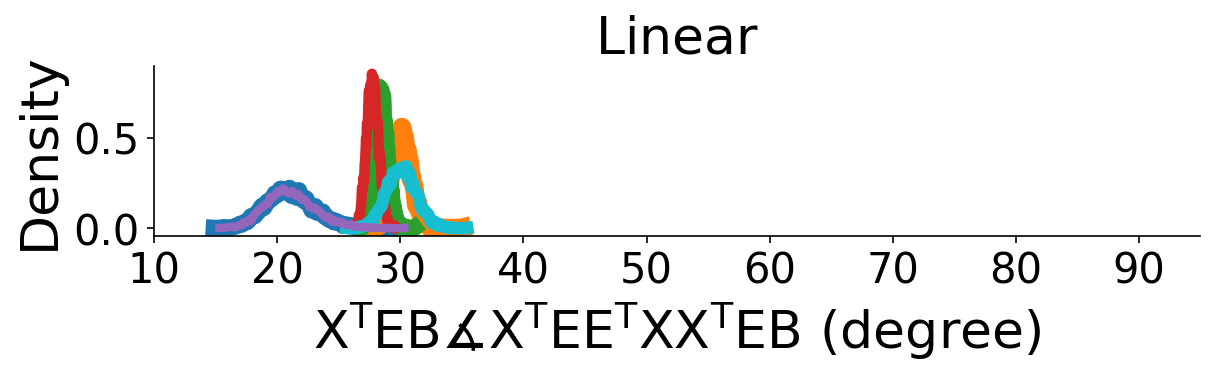

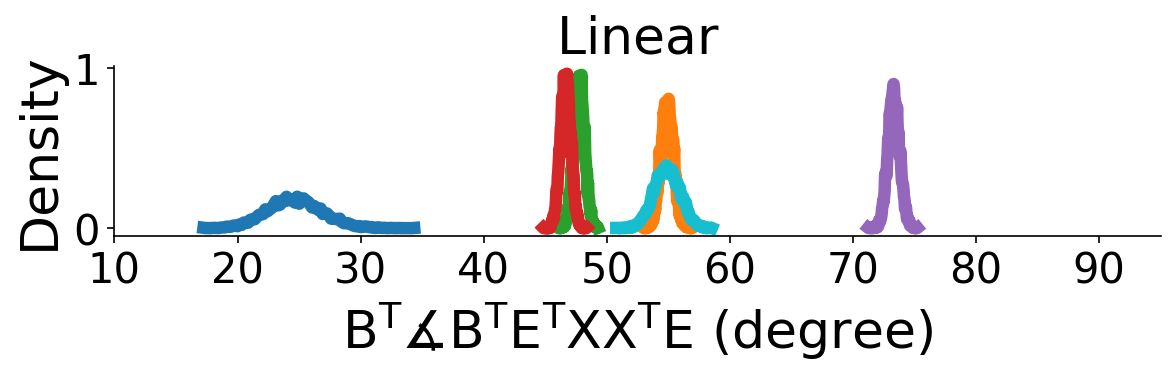

In [ ]:


with open( base_directory_data_str +  "/cond1(100,100,10,100)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond1 = pickle.load(fp)

with open(base_directory_data_str +  "/cond1(100,100,10,100)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond1 = pickle.load(fp)



with open( base_directory_data_str +  "/cond2(100,100,100,100)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond2 = pickle.load(fp)

with open( base_directory_data_str +  "/cond2(100,100,100,100)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond2 = pickle.load(fp)


with open( base_directory_data_str +  "/cond3(100,100,100,500)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond3 = pickle.load(fp)

with open(base_directory_data_str +  "/cond3(100,100,100,500)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond3 = pickle.load(fp)



with open( base_directory_data_str +  "/cond4(900,100,100,100)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond4 = pickle.load(fp)

with open( base_directory_data_str +  "/cond4(900,100,100,100)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond4 = pickle.load(fp)


with open( base_directory_data_str +  "/cond5(100,10,100,100)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond5 = pickle.load(fp)

with open(base_directory_data_str +  "/cond5(100,10,100,100)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond5 = pickle.load(fp)

with open( base_directory_data_str +  "/cond6(10,100,100,100)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond6 = pickle.load(fp)

with open( base_directory_data_str +  "/cond6(10,100,100,100)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond6 = pickle.load(fp)





with open( base_directory_data_str +  "/cond6(10,100,100,100)linear_dw.txt"   , "rb") as fp:   #Pickling
  angle_linear_dw_cond6 = pickle.load(fp)

with open( base_directory_data_str +  "/cond5(100,10,100,100)linear_dw.txt"   , "rb") as fp:   #Pickling
  angle_linear_dw_cond5 = pickle.load(fp)

with open( base_directory_data_str +  "/cond4(900,100,100,100)linear_dw.txt"  , "rb") as fp:   #Pickling
  angle_linear_dw_cond4 = pickle.load(fp)

with open(base_directory_data_str +  "/cond3(100,100,100,500)linear_dw.txt"  , "rb") as fp:   #Pickling
  angle_linear_dw_cond3 = pickle.load(fp)

with open( base_directory_data_str +  "/cond2(100,100,100,100)linear_dw.txt"  , "rb") as fp:   #Pickling
  angle_linear_dw_cond2 = pickle.load(fp)

with open(base_directory_data_str +  "/cond1(100,100,10,100)linear_dw.txt"  , "rb") as fp:   #Pickling
  angle_linear_dw_cond1 = pickle.load(fp)

line_width_ = 6
line_width_3_ = 8
line_width_2_ = 4
plt_fontsize_label_= 25



histogram_size_ = (9,1.5)

plt.figure(num = None, figsize=histogram_size_, dpi=150, facecolor='w', edgecolor='k')



counts , bins  = np.histogram(angle_linear_dw_cond1  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_3_  , color= my_cycle[0] ) 


counts , bins  = np.histogram(angle_linear_dw_cond2  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2"  , linewidth = line_width_+3 , color= my_cycle[1] ) 


counts , bins  = np.histogram(angle_linear_dw_cond3  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 3"  , linewidth = line_width_ +2 , color= my_cycle[2] ) 


counts , bins  = np.histogram(angle_linear_dw_cond4  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_-1  , color= my_cycle[3] ) 



counts , bins  = np.histogram(angle_linear_dw_cond5  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[5] ) 



counts , bins  = np.histogram(angle_linear_dw_cond6  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_2_  , color= my_cycle[6] ) 





plt.xlabel(r"$X^TEB \measuredangle X^TEE^TXX^TEB\ (degree)$", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)


plt.title(r'$Linear$' , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlim( 10 , 95)


plt.xticks(range(10,100,10))

plt.savefig(base_directory_figure_str+ '/hist1_size_change_linear_dW1.jpg' , dpi=300 , bbox_inches='tight' ) 


plt.show()



##################################

plt.figure(num = None, figsize= histogram_size_ , dpi=150, facecolor='w', edgecolor='k')



counts , bins  = np.histogram(angle_linear_cond1  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[0] ) 


counts , bins  = np.histogram(angle_linear_cond2  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2"  , linewidth = line_width_  , color= my_cycle[1] ) 


counts , bins  = np.histogram(angle_linear_cond3  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 3"  , linewidth = line_width_  , color= my_cycle[2] ) 


counts , bins  = np.histogram(angle_linear_cond4  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[3] ) 



counts , bins  = np.histogram(angle_linear_cond5  ,bins = 100 , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_ , color= my_cycle[5] ) 



counts , bins  = np.histogram(angle_linear_cond6  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[6] ) 





plt.xlabel(r"$B^T \measuredangle B^TE^TXX^TE\ (degree)$", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)


plt.title(r'$Linear$' , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlim( 10 , 95)


plt.xticks(range(10,100,10))

plt.savefig(base_directory_figure_str+ '/hist1_size_change_linear.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()







## Plot legend of  figure 1

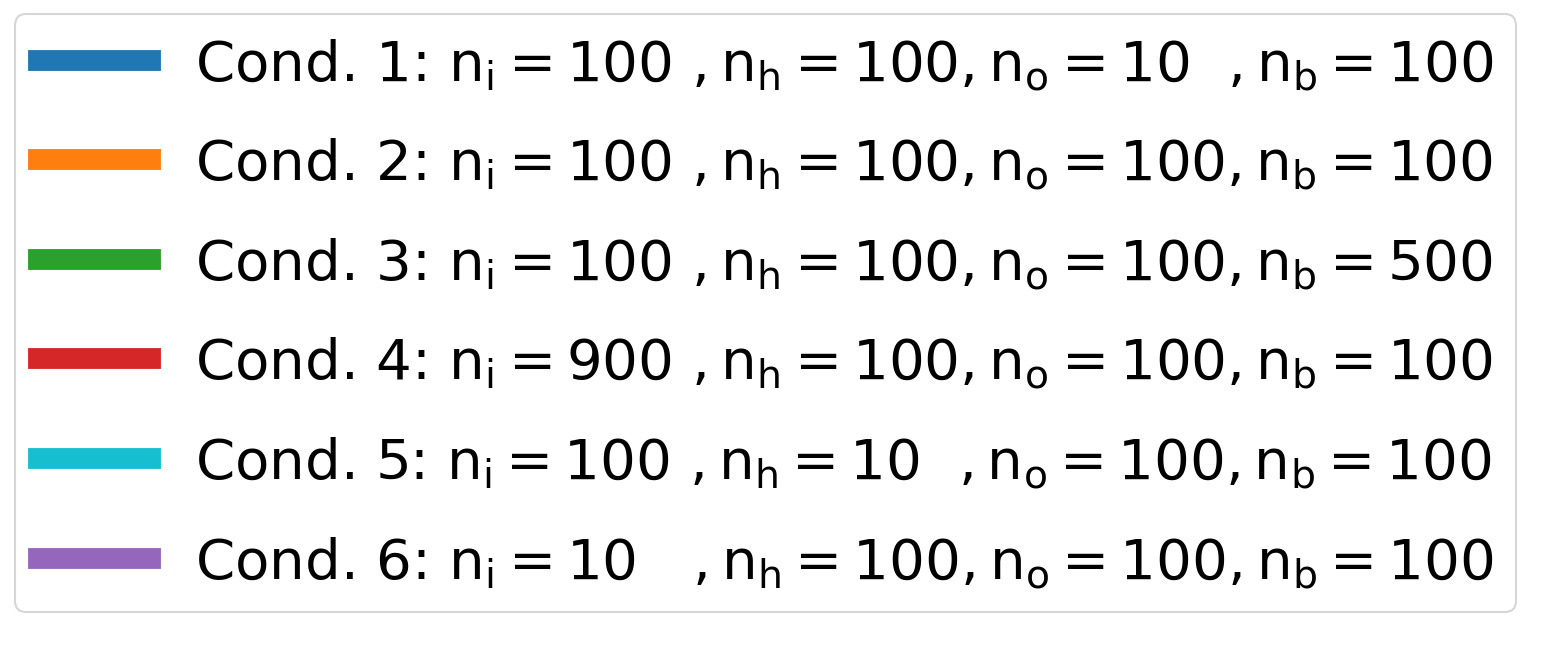

In [ ]:
cond1_label = r"Cond. 1: $n_i=100\ ,n_h=100,n_o=10\ \ ,n_b=100$"
cond2_label = r"Cond. 2: $n_i=100\ ,n_h=100,n_o=100,n_b=100$"
cond3_label = r"Cond. 3: $n_i=100\ ,n_h=100,n_o=100,n_b=500$"
cond4_label = r"Cond. 4: $n_i=900\ ,n_h=100,n_o=100,n_b=100$"
cond5_label = r"Cond. 5: $n_i=100\ ,n_h=10\ \ ,n_o=100,n_b=100$"
cond6_label = r"Cond. 6: $n_i=10\ \ \ ,n_h=100,n_o=100,n_b=100$"

plt.figure(num = None, figsize=(9, 5), dpi=150, facecolor='w', edgecolor='k')


plt.plot( [0]  , '-' , label = cond1_label , linewidth = 3  , color= my_cycle[0] ) 
plt.plot( [0]  , '-' , label = cond2_label , linewidth = 3  , color= my_cycle[1] ) 
plt.plot( [0]  , '-' , label = cond3_label, linewidth = 3  , color= my_cycle[2] ) 
plt.plot( [0]  , '-' , label = cond4_label, linewidth = 3  , color= my_cycle[3] ) 
plt.plot( [0]  , '-' , label = cond5_label, linewidth = 3  , color= my_cycle[5] ) 
plt.plot( [0]  , '-' , label = cond6_label, linewidth = 3  , color= my_cycle[6] ) 

leg =  plt.legend( loc='lower right'  , fontsize = plt_fontsize_legend_  , markerscale=5  , labelspacing = 0.8 , columnspacing = .1   )

for line in leg.get_lines():
    line.set_linewidth(10.0)





ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')


def export_legend(legend, filename  , expand=[-2,-2,2,2]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename=base_directory_figure_str+ "/legend_figure1.jpg"  )



plt.show()



# Figure 2

## Cond. 1 




In [ ]:
N_input = 100
N_hidden = 100
N_output = 50
N_batch = 20

sample_size = 10000

In [ ]:


angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []

angle_linear_cond_norm_skew_symm_norm_symm  = []



angle_linear_cond1  = []
angle_nonlinear_cond1  = []
angle_linear_dw_cond1 = []




def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1

B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )

beta=0.8
for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )
  E2 = torch.randn( [N_batch , N_output] )



  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = torch.randn( [N_batch , N_input] )


  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond1  . append(    my_weight.angle(  temp1   ,   B.t()   )     )



  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond1 . append(    my_weight.angle(  temp1   ,   B.t()   )     )


  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )


  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )
  ########################################################
  
  temp1 = torch.matmul(  X_1.t() , E1   )
  temp1 = torch.matmul(  temp1 , E2.t()   )
  temp1 = torch.matmul(  temp1 , X_2   )
  temp1 = torch.matmul(  temp1 , X_1.t()   )
  temp1 = torch.matmul(  temp1 , E1   )
  temp1 = torch.matmul(  temp1 ,  B )

  temp2 = torch.matmul(  X_1.t() , E1   )
  temp2 = torch.matmul(  temp2 ,  B )
  

  angle_linear_dw_cond1 . append(    my_weight.angle(  temp1   ,   temp2   )     )




with open(base_directory_data_str +"/cond1(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond1  , fp)



with open( base_directory_data_str +"/cond1(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond1  , fp)




with open(base_directory_data_str +"/cond1(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)



with open( base_directory_data_str +"/cond1(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)

with open( base_directory_data_str +"/cond1(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)


## Cond. 2 

In [ ]:

angle_linear_cond_norm_skew_symm_norm_symm  = []

angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []



angle_linear_cond2 = []
angle_nonlinear_cond2 = []





def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )

  E2 = E1



  X_1 = torch.randn( [N_batch , N_input] )

  X_2 = torch.randn( [N_batch , N_input] )



  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond2  . append(    my_weight.angle(  temp1   ,   B.t()   )     )



  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond2 . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )
  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )



with open( base_directory_data_str +"/cond2(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond2  , fp)



with open(base_directory_data_str +"/cond2(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond2  , fp)




with open(base_directory_data_str +"/cond2(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)

with open( base_directory_data_str +"/cond2(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)


with open( base_directory_data_str +"/cond2(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)


## Cond. 3 

In [ ]:

angle_linear_cond_norm_skew_symm_norm_symm  = []


angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []

angle_linear_cond = []
angle_nonlinear_cond = []



def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )+.5
  E2 = torch.randn( [N_batch , N_output] )+.5




  X_1 = torch.randn( [N_batch , N_input] )+.5
 
  X_2 = torch.randn( [N_batch , N_input] )+.5



  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 


  angle_nonlinear_cond  . append(    my_weight.angle(  temp1   ,   B.t()   )     )



  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond.append(    my_weight.angle(  temp1   ,   B.t()   )     )

  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )

  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )


with open( base_directory_data_str +"/cond3(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond  , fp)



with open( base_directory_data_str +"/cond3(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond  , fp)


with open(base_directory_data_str +"/cond3(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)

with open(base_directory_data_str +"/cond3(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)

with open( base_directory_data_str +"/cond3(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)


## Cond. 4 

In [ ]:


angle_linear_cond_norm_skew_symm_norm_symm  = []


angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []

angle_linear_cond = []
angle_nonlinear_cond = []



def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):

  E1 = torch.randn( [N_batch , N_output] )+.5
  E2 = torch.randn( [N_batch , N_output] )+.5


  X_1 = torch.randn( [N_batch , N_input] )+.5

  X_2 = torch.randn( [N_batch , N_input] )+.5


  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) +.5

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 


  angle_nonlinear_cond  . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond . append(    my_weight.angle(  temp1   ,   B.t()   )     )


  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )

  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )


with open( base_directory_data_str +"/cond4(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond  , fp)



with open(base_directory_data_str +"/cond4(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond  , fp)

with open( base_directory_data_str +"/cond4(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)

with open(base_directory_data_str +"/cond4(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)


with open( base_directory_data_str +"/cond4(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)




## Cond. 5

In [ ]:


angle_linear_cond_norm_skew_symm_norm_symm  = []


angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []

angle_linear_cond  = []
angle_nonlinear_cond = []




def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1


B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )


for i in range(sample_size):
  E1 = torch.rand( [N_batch , N_output] )

  E2 = torch.rand( [N_batch , N_output] )



  X_1 = torch.rand( [N_batch , N_input] ) 


  X_2 = torch.rand( [N_batch , N_input] ) 

 


  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond . append(    my_weight.angle(  temp1   ,   B.t()   )     )



  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond . append(    my_weight.angle(  temp1   ,   B.t()   )     )

  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )

  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )

with open( base_directory_data_str +"/cond5(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond  , fp)



with open( base_directory_data_str +"/cond5(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond , fp)


with open(base_directory_data_str +"/cond5(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)

with open(base_directory_data_str +"/cond5(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)

with open(base_directory_data_str +"/cond5(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)



Cond. 6 

In [ ]:


angle_linear_cond_norm_skew_symm_norm_symm  = []


angle_linear_cond_skew_symm  = []
angle_linear_cond_symm  = []

angle_linear_cond  = []
angle_nonlinear_cond = []



def activation1(x):

  return torch.mul( x >= 0 , x  )*1


def derivative_activation1(x):

  return ( x >= 0  ) * 1

B = (torch.randn([N_output , N_hidden])) 
X = (torch.randn([N_batch , N_input])) 
E = torch.randn( [N_batch , N_output] )



for i in range(sample_size):
  E1 = torch.ones( [N_batch , N_output] )

  E2 = torch.ones( [N_batch , N_output] )


  X_1 = torch.ones( [N_batch , N_input] ) 

  X_2 = torch.ones( [N_batch , N_input] ) 




  Z2_1 = torch.randn( [N_batch , N_output] )
  Z2_2 = torch.randn( [N_batch , N_output] )
  Z1_2 = torch.randn( [N_batch , N_hidden] )


  delta1_1 = torch.mul(  E1   ,   derivative_activation1(Z2_1)       )
  delta1_2 = torch.mul(  E2   ,   derivative_activation1(Z2_2)       )



  B = ( torch.randn([N_output , N_hidden]) ) 

  temp1 = torch.matmul(   delta1_2   ,   B   )

  temp1= torch.mul( temp1 ,   derivative_activation1( Z1_2  )    )

  temp1 = temp1.t()



  temp1= torch.matmul( temp1 ,   X_2    )

  temp1= torch.matmul( temp1   ,   X_1.t()    )


  temp1= torch.mul( temp1   ,    derivative_activation1( Z1_2  ).t()    )

  temp1= torch.matmul(  temp1   ,   delta1_1   ) 



  angle_nonlinear_cond . append(    my_weight.angle(  temp1   ,   B.t()   )     )




  ########################################################

  temp1 = torch.matmul(  E1.t() , X_1   )
  temp1 = torch.matmul(  temp1 , X_2.t()   )
  temp1 = torch.matmul(  temp1 , E2  )
  transrom_matrix = temp1.clone()
  temp1 = torch.matmul(   B.t()  , temp1  )

  ########################################################

  angle_linear_cond . append(    my_weight.angle(  temp1   ,   B.t()   )     )


  angle_linear_cond_skew_symm   . append(    my_weight.angle( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ) ,   B.t()   )     )
  angle_linear_cond_symm   . append(    my_weight.angle(   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  )  ,   B.t()   )     )

  angle_linear_cond_norm_skew_symm_norm_symm.append( torch.matmul( B.t() ,  (transrom_matrix-transrom_matrix.t())/2  ).norm()/   torch.matmul( B.t() ,  (transrom_matrix+transrom_matrix.t())/2  ) .norm() )



with open( base_directory_data_str +"/cond6(dist_change)linear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond  , fp)



with open(base_directory_data_str +"/cond6(dist_change)nonlinear.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_nonlinear_cond , fp)


with open(base_directory_data_str +"/cond6(dist_change)linear_skew_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_skew_symm  , fp)

with open( base_directory_data_str +"/cond6(dist_change)linear_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_symm  , fp)


with open( base_directory_data_str +"/cond6(dist_change)_norm_skew_norm_symm.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_linear_cond_norm_skew_symm_norm_symm  , fp)




## Plot figure 2

In [ ]:






with open( base_directory_data_str +"/cond6(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond6 = pickle.load(fp)

with open(  base_directory_data_str +"/cond6(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond6 = pickle.load(fp)

with open(  base_directory_data_str +"/cond6(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond6 = pickle.load(fp)   

###########################################################



with open( base_directory_data_str +"/cond5(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond5 = pickle.load(fp)

with open( base_directory_data_str +"/cond5(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond5 = pickle.load(fp)

with open(  base_directory_data_str +"/cond5(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond5 = pickle.load(fp)    
###########################################################



with open( base_directory_data_str +"/cond4(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond4 = pickle.load(fp)

with open(  base_directory_data_str +"/cond4(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond4 = pickle.load(fp)

with open(  base_directory_data_str +"/cond4(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond4 = pickle.load(fp)  

###########################################################


with open( base_directory_data_str +"/cond3(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond3 = pickle.load(fp)

with open( base_directory_data_str +"/cond3(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond3 = pickle.load(fp)

with open(  base_directory_data_str +"/cond3(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond3 = pickle.load(fp)  
###########################################################


with open(  base_directory_data_str +"/cond2(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond2 = pickle.load(fp)

with open(  base_directory_data_str +"/cond2(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond2 = pickle.load(fp)


with open(  base_directory_data_str +"/cond2(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond2 = pickle.load(fp)  
###########################################################


with open(  base_directory_data_str +"/cond1(dist_change)linear_skew_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_skew_symm_cond1 = pickle.load(fp)

with open(  base_directory_data_str +"/cond1(dist_change)linear_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_symm_cond1 = pickle.load(fp)


with open(  base_directory_data_str +"/cond1(dist_change)_norm_skew_norm_symm.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond_norm_skew_symm_norm_symm_cond1 = pickle.load(fp)
###########################################################





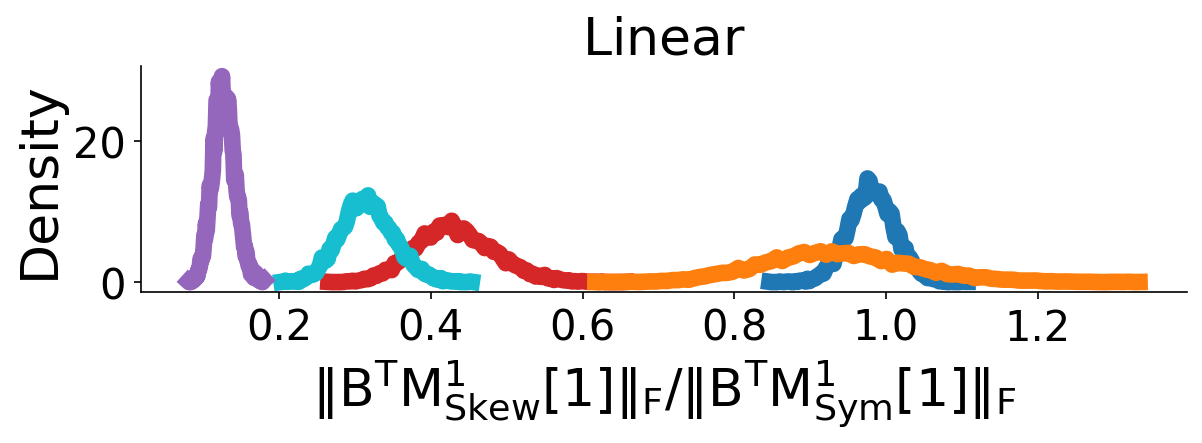

In [ ]:

line_width_ = 8

plt_fontsize_label_= 25





plt.figure(num = None, figsize=( 9 , 2), dpi=150, facecolor='w', edgecolor='k')



counts , bins  = np.histogram(angle_linear_cond_norm_skew_symm_norm_symm_cond1  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[0] ) 

# #########################################################################################################

counts , bins  = np.histogram(angle_linear_cond_norm_skew_symm_norm_symm_cond2  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2"  , linewidth = line_width_  , color= my_cycle[1] ) 





# ######################################################################################################################

counts , bins  = np.histogram(angle_linear_cond_norm_skew_symm_norm_symm_cond3  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[3] ,zorder=-1 ) # red


######################################################################################################################


counts , bins  = np.histogram(angle_linear_cond_norm_skew_symm_norm_symm_cond4  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_ , color= my_cycle[5] ) 



# ######################################################################################################################

counts , bins  = np.histogram(angle_linear_cond_norm_skew_symm_norm_symm_cond5  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[6] ) 


# ######################################################################################################################



plt.xlabel(r"${\Vert B^TM^1_{Skew}[1] \Vert }_{F} / {\Vert B^TM^1_{Sym}[1] \Vert }_{F} $", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)


plt.title(r'$Linear$' , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.savefig( base_directory_figure_str + '/hist1_DIST_change_norm_skew_norm_sym_linear.jpg' 
            , dpi=300 , bbox_inches='tight' ) 


plt.show()










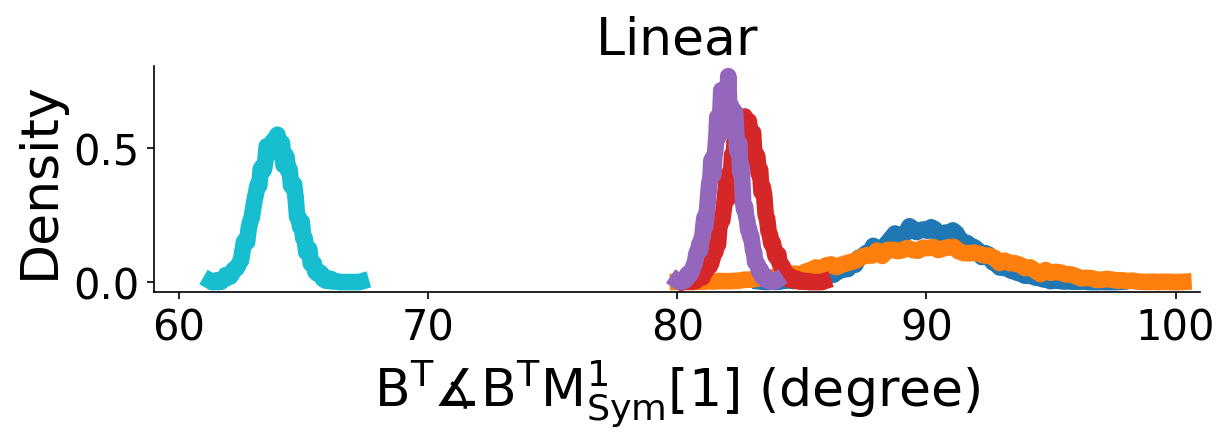

In [ ]:
line_width_ = 8

plt_fontsize_label_= 25

plt.figure(num = None, figsize=( 9 , 2), dpi=150, facecolor='w', edgecolor='k')





counts , bins  = np.histogram(angle_linear_cond_symm_cond1  ,bins = 100  , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[0] ) 
#########################################################################################################



counts , bins  = np.histogram(angle_linear_cond_symm_cond2  ,bins = 100 , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[1] ) 
######################################################################################################################




counts , bins  = np.histogram(angle_linear_cond_symm_cond3  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[3] ) 
######################################################################################################################






counts , bins  = np.histogram(angle_linear_cond_symm_cond4  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[5] ) 
######################################################################################################################




counts , bins  = np.histogram(angle_linear_cond_symm_cond5  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_   , color= my_cycle[6] ) 
######################################################################################################################





plt.xlabel(r"$B^T \measuredangle B^TM^1_{Sym}[1]\ (degree)$", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)

plt.title(r'$Linear$' , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlim( 59 , 101)



plt.xticks(range(60,101,10))

plt.savefig(base_directory_figure_str + '/hist1_DIST_change_M_sym_linear.jpg' 
            , dpi=300 , bbox_inches='tight' ) 
plt.show()


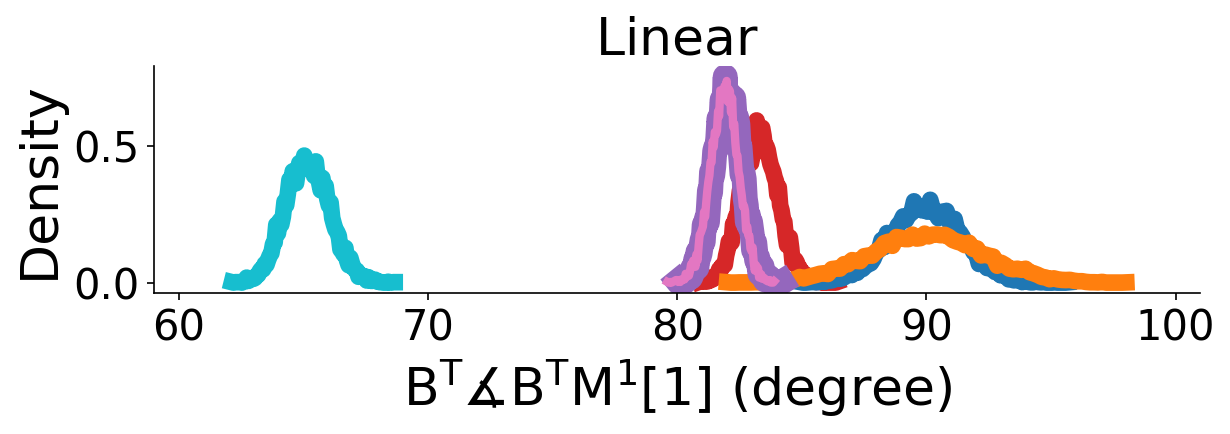

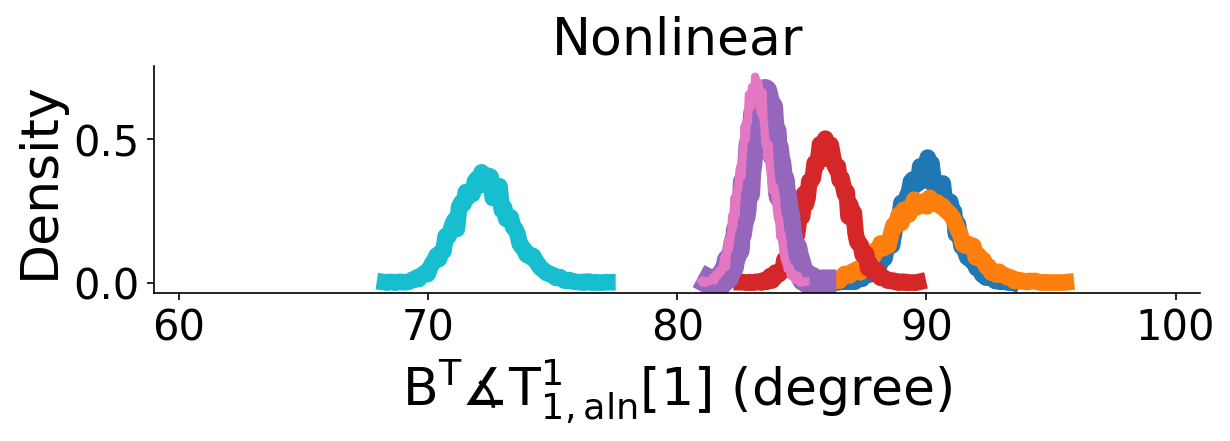

In [ ]:





with open(  base_directory_data_str +"/cond1(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond1 = pickle.load(fp)


with open(  base_directory_data_str +"/cond1(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond1 = pickle.load(fp)


with open(  base_directory_data_str +"/cond2(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond2 = pickle.load(fp)


with open(  base_directory_data_str +"/cond2(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond2 = pickle.load(fp)



with open(  base_directory_data_str +"/cond3(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond3 = pickle.load(fp)


with open(  base_directory_data_str +"/cond3(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond3 = pickle.load(fp)


with open(  base_directory_data_str +"/cond4(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond4 = pickle.load(fp)


with open(  base_directory_data_str +"/cond4(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond4 = pickle.load(fp)




with open(  base_directory_data_str +"/cond5(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond5 = pickle.load(fp)


with open(  base_directory_data_str +"/cond5(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond5 = pickle.load(fp)




with open(  base_directory_data_str +"/cond6(dist_change)linear.txt"  , "rb") as fp:   #Pickling
  angle_linear_cond6 = pickle.load(fp)


with open(  base_directory_data_str +"/cond6(dist_change)nonlinear.txt"  , "rb") as fp:   #Pickling
  angle_nonlinear_cond6 = pickle.load(fp)



plt_fontsize_label_= 25

line_width_ = 8
line_width_2_ = 4

line_width_3_ = 12



plt.figure(num = None, figsize=( 9 , 2), dpi=150, facecolor='w', edgecolor='k')



counts , bins  = np.histogram(angle_linear_cond1  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  

plt.plot( bins_Center , counts , '-' , label = r"Cond. 1"  , linewidth = line_width_  , color= my_cycle[0] ) 




#########################################################################################################

counts , bins  = np.histogram(angle_linear_cond2  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2"  , linewidth = line_width_  , color= my_cycle[1] ) 


######################################################################################################################

counts , bins  = np.histogram(angle_linear_cond3  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[3] ,zorder=-1 ) 




######################################################################################################################


counts , bins  = np.histogram(angle_linear_cond4  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_  , color= my_cycle[5] ) 




######################################################################################################################

counts , bins  = np.histogram(angle_linear_cond5 ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_3_ , color= my_cycle[6] ) 




######################################################################################################################

counts , bins  = np.histogram(angle_linear_cond6  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 4"  , linewidth = line_width_2_  , color= my_cycle[8] ) 




plt.xlabel(r"$B^T \measuredangle B^TM^1[1]\ (degree)$", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)


plt.title(r'$Linear$' , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlim( 59 , 101)



plt.xticks(range(60,101,10))

plt.savefig(base_directory_figure_str + '/hist1_DIST_change_linear.jpg' 
            , dpi=300 , bbox_inches='tight' ) 
plt.show()




plt.figure(num = None, figsize=( 9 , 2 ), dpi=150, facecolor='w', edgecolor='k')

counts , bins  = np.histogram(angle_nonlinear_cond1  ,bins = 100 , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  



plt.plot( bins_Center , counts , '-' , label = r"Cond. 1" , linewidth = line_width_  , color= my_cycle[0] ) 




counts , bins  = np.histogram(angle_nonlinear_cond2  ,bins = 100 , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2" , linewidth = line_width_  , color= my_cycle[1] ) 




counts , bins  = np.histogram(angle_nonlinear_cond3 ,bins = 100 , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 2" , linewidth = line_width_  , color= my_cycle[3] ) 




counts , bins  = np.histogram(angle_nonlinear_cond4 ,bins = 100  , density=True)
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 5" , linewidth = line_width_  , color= my_cycle[5] ) 

counts , bins  = np.histogram(angle_nonlinear_cond5 ,bins = 100  , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 5" , linewidth = line_width_3_ , color= my_cycle[6] ) 

counts , bins  = np.histogram(angle_nonlinear_cond6 ,bins = 100  , density=True )
bins_Center = []
for i in range( len(bins)-1 ):
  bins_Center.append( (bins[i] + bins[i+1])/2  )
  
plt.plot( bins_Center , counts , '-' , label = r"Cond. 5" , linewidth = line_width_2_ , color= my_cycle[8] ) 


plt.xlabel(r"$B^T \measuredangle T^1_{1,aln}[1]\ (degree)$", fontsize= plt_fontsize_label_)
plt.ylabel(r"Density", fontsize= plt_fontsize_label_)

plt.title(  r'$Nonlinear$'  , fontsize= plt_fontsize_label_   )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlim( 59 , 101)
plt.xticks(range(60,101,10))

plt.savefig(base_directory_figure_str + '/hist1_DIST_change_nonlinear.jpg' 
            , dpi=300 , bbox_inches='tight' ) 



plt.show()



## Plot eigenvalue histograms for figure 1

In [ ]:
N_input = 100
N_hidden = 100
N_output = 50
N_batch = 20



E1 = torch.randn( [N_batch , N_output] )
E2 = torch.randn( [N_batch , N_output] )


X_1 = torch.randn( [N_batch , N_input] )
X_2 = torch.randn( [N_batch , N_input] )


temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input


temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2


eigv_cond1 , v = np.linalg.eig( temp1.numpy() )

eigv_cond1_skew_symmetric , v = np.linalg.eig( temp2.numpy() )

# cond 2


E1 = torch.randn( [N_batch , N_output] )
E2 = E1

X_1 = torch.randn( [N_batch , N_input] )
X_2 = torch.randn( [N_batch , N_input] )


temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input

temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2

eigv_cond2 , v = np.linalg.eig( temp1.numpy() )

eigv_cond2_skew_symmetric , v = np.linalg.eig( temp2.numpy() )

# cond 3




E1 = torch.randn( [N_batch , N_output] )+.5
E2 = torch.randn( [N_batch , N_output] )+.5


X_1 = torch.randn( [N_batch , N_input] )+.5
X_2 = torch.randn( [N_batch , N_input] )+.5


temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input

temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2

eigv_cond3 , v = np.linalg.eig( temp1.numpy() )

eigv_cond3_skew_symmetric , v = np.linalg.eig( temp2.numpy() )


# cond 4

E1 = torch.randn( [N_batch , N_output] )+.5
E2 = torch.randn( [N_batch , N_output] )+.5


X_1 = torch.randn( [N_batch , N_input] )+.5
X_2 = torch.randn( [N_batch , N_input] )+.5


temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input

temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2

eigv_cond4 , v = np.linalg.eig( temp1.numpy() )

eigv_cond4_skew_symmetric , v = np.linalg.eig( temp2.numpy() )


# cond 5

E1 = torch.rand( [N_batch , N_output] )
E2 = torch.rand( [N_batch , N_output] )

X_1 = torch.rand( [N_batch , N_input] ) 
X_2 = torch.rand( [N_batch , N_input] ) 


temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input



temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2

eigv_cond5 , v = np.linalg.eig( temp1.numpy() )

eigv_cond5_skew_symmetric , v = np.linalg.eig( temp2.numpy() )

# eigv_cond5 = np.real(eigv_cond5)

# cond 6
E1 = torch.ones( [N_batch , N_output] )
E2 = torch.ones( [N_batch , N_output] )

X_1 = torch.ones( [N_batch , N_input] ) 
X_2 = torch.ones( [N_batch , N_input] ) 



temp1 = torch.matmul(  E1.t() , X_1   )
temp1 = torch.matmul(  temp1 , X_2.t()   )
temp1 = torch.matmul(  temp1 , E2  )/N_batch/N_input




temp2 = (temp1-temp1.t())/2
temp1 = (temp1+temp1.t())/2

eigv_cond6 , v = np.linalg.eig( temp1.numpy() )

eigv_cond6_skew_symmetric , v = np.linalg.eig( temp2.numpy() )


eigv_cond6 = np.real(eigv_cond6)


##################



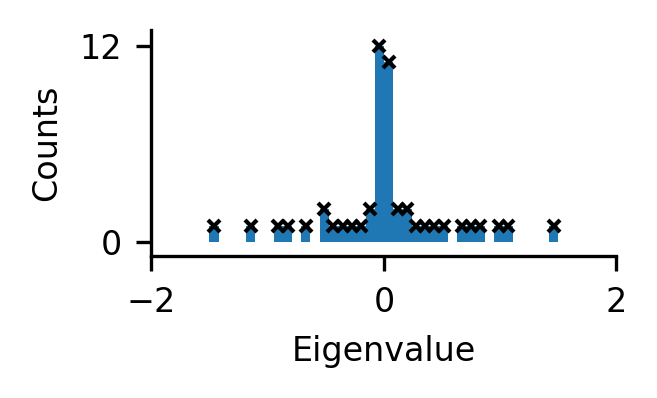

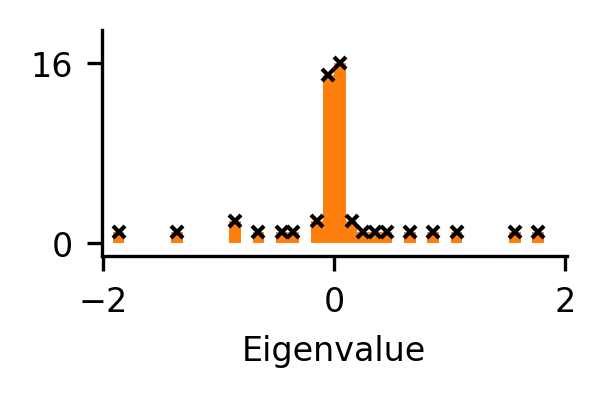

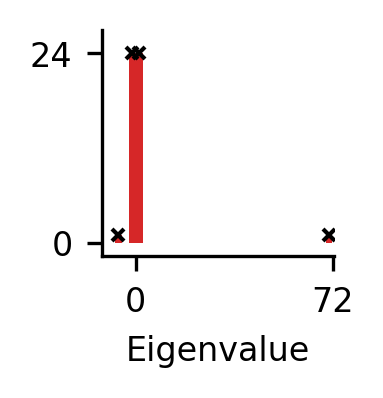

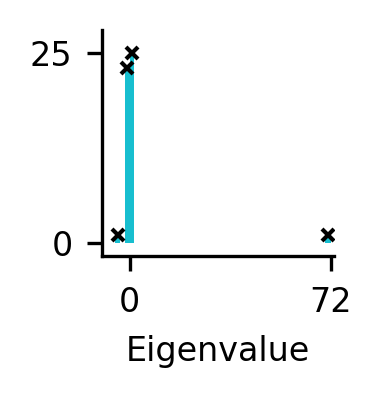

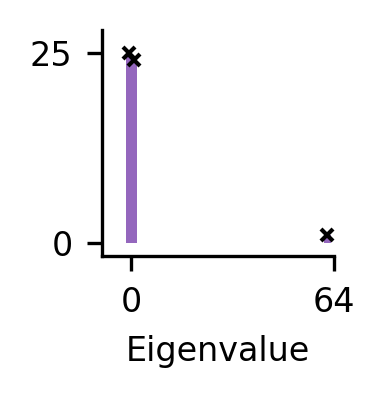

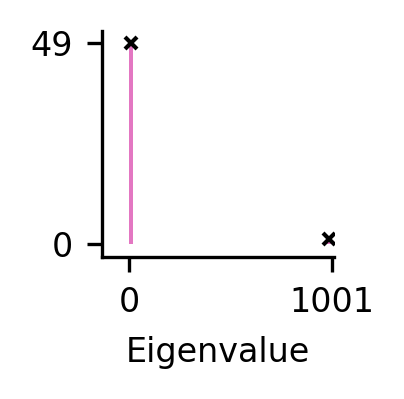

In [ ]:

font_size_22_ = 8
figsize__ = (2,1)
bins_ = 100 
markersize_ = 3
zero_scale = 15
##########################################
eigv_cond = eigv_cond1
max =  np.abs(eigv_cond) . max()
bins_ = np.linspace(-max , max , 39 )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[0] )

bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)



plt.ylim( - (n.max() + 1 )/zero_scale ,n.max() + 1 )
plt.yticks([0,n.max() ] )
plt.xlim(- np.abs(eigv_cond).max() - np.abs(eigv_cond).max() /20 ,np.abs(eigv_cond).max() +  np.abs(eigv_cond).max() /20 )
plt.xticks([- round(np.abs(eigv_cond.max())   ,0) , 0 , round(np.abs(eigv_cond.max())   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DISTchange_1.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()


##########################################
eigv_cond = eigv_cond2
max =  np.abs(eigv_cond) . max()
bins_ = np.linspace(-max , max , 39 )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[1] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)



plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim(- np.abs(eigv_cond).max() - np.abs(eigv_cond).max() /20 ,np.abs(eigv_cond).max() +  np.abs(eigv_cond).max() /20 )
plt.xticks([- round(np.abs(eigv_cond.max())   ,0) , 0 , round(np.abs(eigv_cond.max())   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DIST_change_2.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()

figsize__ = (1,1)




##########################################
eigv_cond = eigv_cond3
max =  np.abs(eigv_cond) . max()
min =  (eigv_cond) . min() - 1
if min > 0 :
  raise Exception("min>0")
bins_ = np.append( np.delete( np.linspace( min , -min , 7 ) , [-1] )    , np.linspace( -min , max , 30) )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[3] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)



plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim( min - (eigv_cond.max() + 1 )/ zero_scale  , eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DIST_change_3.jpg' , dpi=300 , bbox_inches='tight' ) 
plt.show()


##########################################
eigv_cond = eigv_cond4
max =  np.abs(eigv_cond) . max()
min =  (eigv_cond) . min() - 1
if min > 0 :
  raise Exception("min>0")
bins_ = np.append( np.delete( np.linspace( min , -min , 7) , [-1] )    , np.linspace( -min , max , 30) )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[5] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)



plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim( min - (eigv_cond.max() + 1 )/ zero_scale  , eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max()   ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DIST_change_4.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()

##########################################
eigv_cond = eigv_cond5
max =  np.abs(eigv_cond) . max()

if min > 0 :
  raise Exception("min>0")
bins_ = np.append( np.delete( np.linspace( min , -min , 7 ) , [-1] )    , np.linspace( -min , max , 30) )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[6] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])

plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)



plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim( min - (eigv_cond.max() + 1 )/ zero_scale  , eigv_cond.max() + 1 )
plt.xticks([0, round(eigv_cond.max() + 1  ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DIST_change_5.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()



##########################################
eigv_cond = eigv_cond6
max =  np.abs(eigv_cond) . max()
min =  (eigv_cond) . min() - 70
if min > 0 :
  raise Exception("min>0")
bins_ = np.append( np.delete( np.linspace( min , -min , 9) , [-1] )    , np.linspace( -min , max , 30) )

plt.figure(num = None, figsize= figsize__ , dpi=300 , facecolor='w', edgecolor='k')
n,bins,patches = plt.hist(eigv_cond , bins = bins_ , align='mid' , color = my_cycle[8] )
bins2 = []
n_2 = []

for i in range( len(n) ):
  if n[i]!=0:
    bins2.append( (bins[i]+bins[i+1])/2 )
    n_2.append(n[i])
plt.plot(   bins2,  n_2 , marker= "x" , c='k', markersize= markersize_ , alpha=1 , linestyle = "" , linewidth = 2)


plt.ylim(- (n.max() + 1 )/zero_scale ,n.max() + 3 )
plt.yticks([0,n.max() ] )
plt.xlim( min - (eigv_cond.max() + 1 )/ zero_scale  , eigv_cond.max() + 10 )
plt.xticks([0, round(eigv_cond.max() + 1  ,0) ]   )
plt.xlabel("Eigenvalue"  , fontsize= font_size_22_  )
# plt.ylabel("Counts"  , fontsize= font_size_22_  )
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize= font_size_22_ )
ax.tick_params(axis='y', labelsize=  font_size_22_  )
plt.savefig(base_directory_figure_str + '/eig_DIST_change_6.jpg' , dpi=300 , bbox_inches='tight' ) 

plt.show()


## Plot legend for figure 2

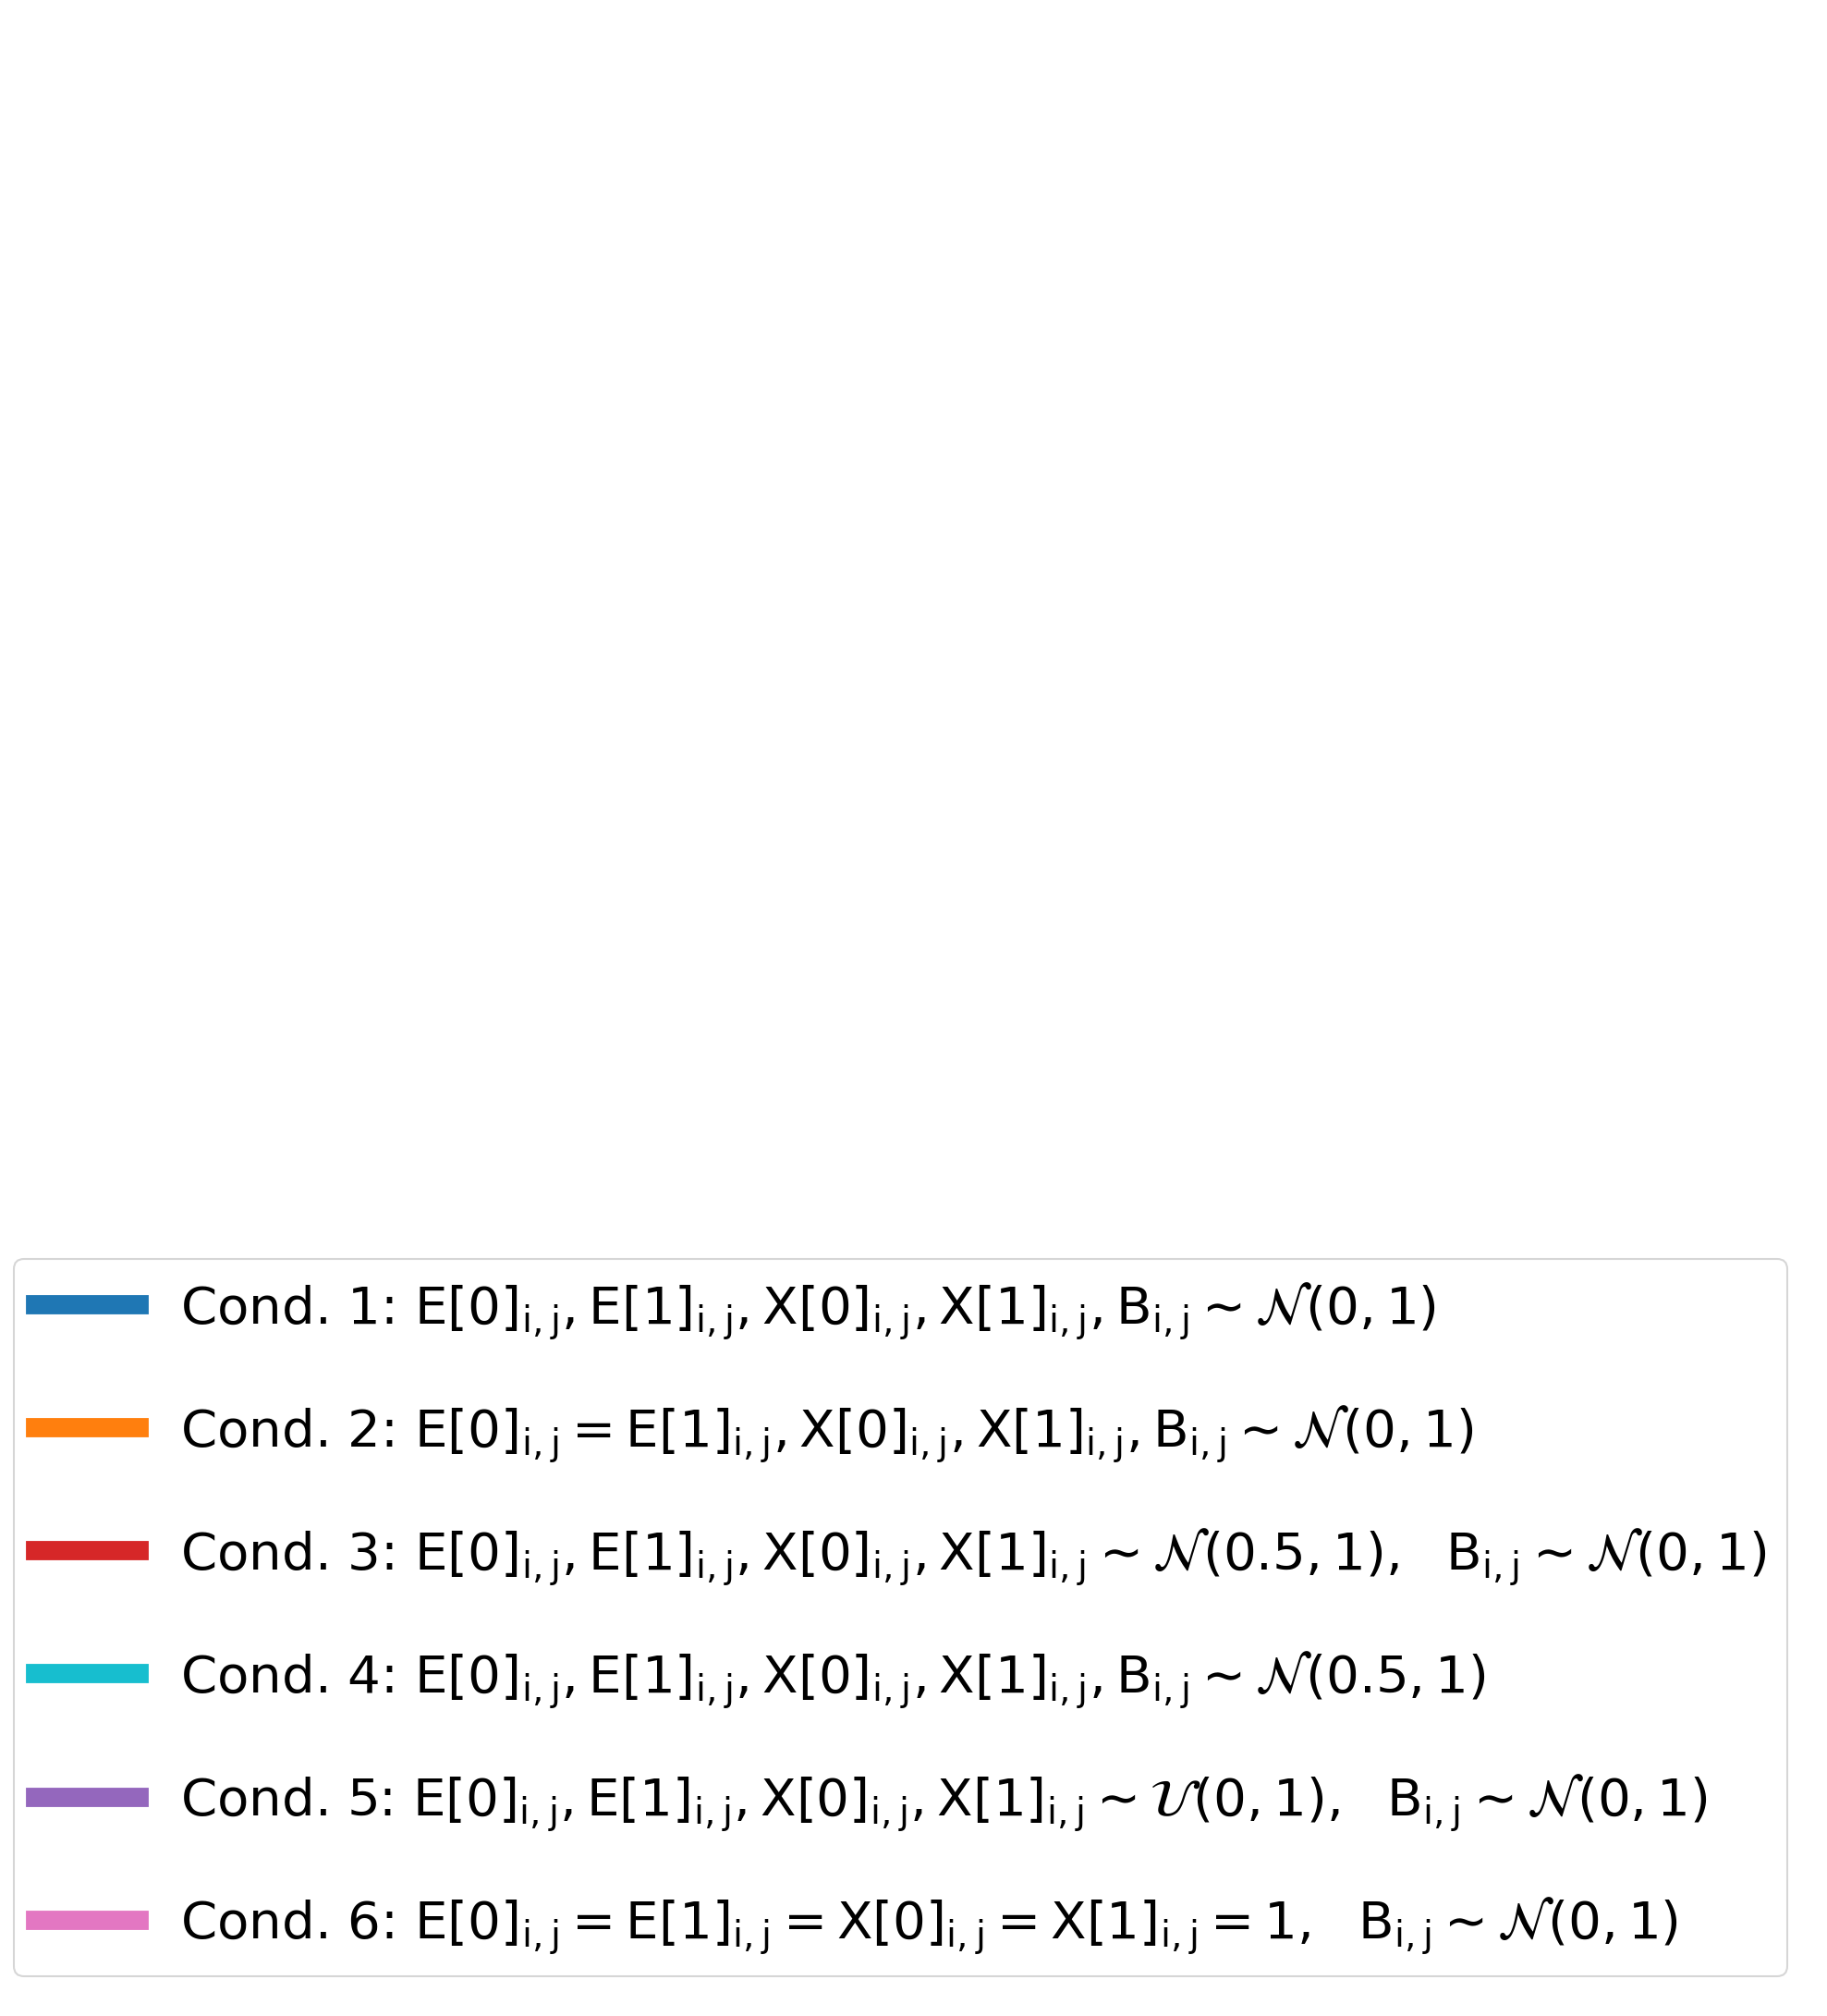

In [ ]:
cond1_dist_change_label = r"Cond. 1: $E[0]_{i,j},E[1]_{i,j},X[0]_{i,j},X[1]_{i,j},B_{i,j}\sim \mathcal{N}(0,1)$"
cond2_dist_change_label = r"Cond. 2: $E[0]_{i,j}=E[1]_{i,j},X[0]_{i,j},X[1]_{i,j},B_{i,j}\sim \mathcal{N}(0,1)$"


cond3_dist_change_label = r"Cond. 3: $E[0]_{i,j},E[1]_{i,j},X[0]_{i,j},X[1]_{i,j}\sim \mathcal{N}(0.5,1),\ \ B_{i,j}\sim \mathcal{N}(0,1)$"
cond4_dist_change_label = r"Cond. 4: $E[0]_{i,j},E[1]_{i,j},X[0]_{i,j},X[1]_{i,j},B_{i,j}\sim \mathcal{N}(0.5,1)$"

cond5_dist_change_label = r"Cond. 5: $E[0]_{i,j},E[1]_{i,j},X[0]_{i,j},X[1]_{i,j}\sim \mathcal{U}(0,1),\ \ B_{i,j}\sim \mathcal{N}(0,1)$"
cond6_dist_change_label = r"Cond. 6: $E[0]_{i,j}=E[1]_{i,j}=X[0]_{i,j}=X[1]_{i,j}=1, \ \  B_{i,j}\sim \mathcal{N}(0,1)$"




plt.figure(num = None, figsize=(9, 19), dpi=150, facecolor='w', edgecolor='k')


plt.plot( [0]  , '-' , label = cond1_dist_change_label , linewidth = 3  , color= my_cycle[0] ) 
plt.plot( [0]  , '-' , label = cond2_dist_change_label, linewidth = 3  , color= my_cycle[1] ) 

plt.plot( [0]  , '-' , label = cond3_dist_change_label, linewidth = 3  , color= my_cycle[3] ) 
plt.plot( [0]  , '-' , label = cond4_dist_change_label, linewidth = 3  , color= my_cycle[5] ) 
plt.plot( [0]  , '-' , label = cond5_dist_change_label, linewidth = 3  , color= my_cycle[6] ) 
plt.plot( [0]  , '-' , label = cond6_dist_change_label, linewidth = 3  , color= my_cycle[8] ) 

leg =  plt.legend( loc='lower right'  , fontsize = plt_fontsize_legend_  , markerscale=5  , labelspacing = 1.2 , columnspacing = .1  )

for line in leg.get_lines():
    line.set_linewidth(10)





ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')


def export_legend(legend, filename  , expand=[-1,-1,1,1]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


export_legend(leg  , filename=base_directory_figure_str + "/legend_figure2.jpg"  )



plt.show()
